In [196]:
import numpy
import numpy.random as rng
from IPython.display import SVG
import pydot as pd

In [197]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
import theano
import theano.tensor as T
import theano.d3printing as d3p

In [199]:
# Training data
N = 400
feats = 784
D = (rng.randn(N, feats).astype(theano.config.floatX), rng.randint(size=N,low=0, high=2).astype(theano.config.floatX))
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
w = theano.shared(rng.randn(feats).astype(theano.config.floatX), name="w")
b = theano.shared(numpy.asarray(0., dtype=theano.config.floatX), name="b")
x.tag.test_value = D[0]
y.tag.test_value = D[1]

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w)-b)) # Probability of having a one
prediction = p_1 > 0.5 # The prediction that is done: 0 or 1

# Compute gradients
xent = -y*T.log(p_1) - (1-y)*T.log(1-p_1) # Cross-entropy
cost = xent.mean() + 0.01*(w**2).sum() # The cost to optimize
gw,gb = T.grad(cost, [w,b])

# Training and prediction function
train = theano.function(inputs=[x,y], outputs=[prediction, xent],
                        updates=[[w, w-0.01*gw], [b, b-0.01*gb]],
                        name = "train", profile=False)
predict = theano.function(inputs=[x], outputs=prediction,
                          name = "predict", profile=False)

In [200]:
gf = d3p.GraphFormatter()
g = gf.to_pydot(predict)

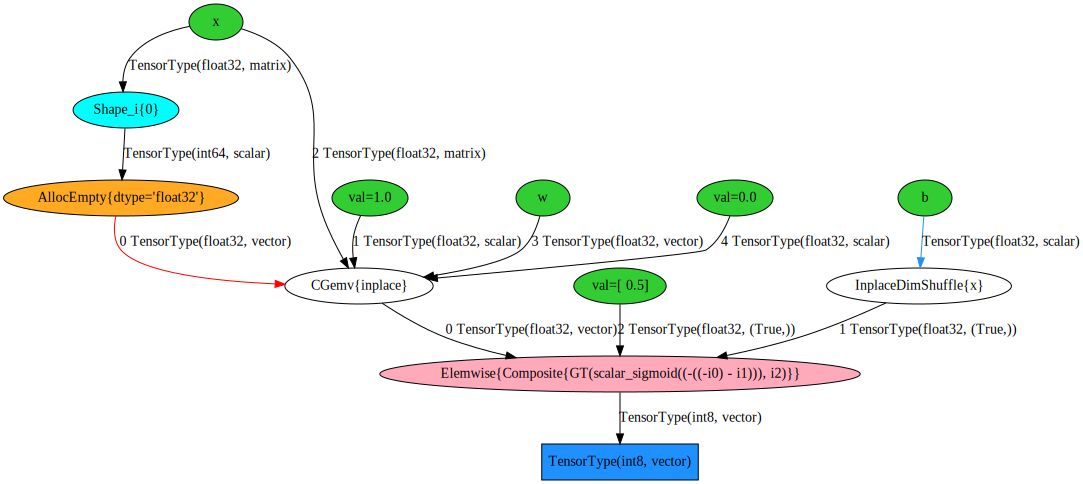

In [201]:
SVG(g.create_svg())

In [202]:
g.write_dot('./dev/graph.dot')

True

# Model 

In [21]:
n = 100
m = 50
h = 10

W = theano.shared(np.random.normal(0, 1, (m, h)).astype(theano.config.floatX), borrow=True)
X = T.dmatrix('X')
Z = T.nnet.sigmoid(T.dot(X, W) + 10)
zm = T.mean(Z)

predict_profiled = theano.function([X], [Z, zm], profile=True)
data = rng.rand(n, m)
dZ, dzm = predict_profiled(data)

predict_unprofiled = theano.function([X], [Z, zm], profile=False)

In [26]:
f = predict_unprofiled

In [27]:
topo = f.maker.fgraph.toposort()

In [28]:
topo

[Shape_i{1}(<TensorType(float32, matrix)>),
 Shape_i{0}(X),
 dot(X, <TensorType(float32, matrix)>),
 MakeVector(Shape_i{0}.0, Shape_i{1}.0),
 Elemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 1)](TensorConstant{(1, 1) of 10.0}, dot.0),
 Elemwise{Cast{float64}}(MakeVector.0),
 Sum{acc_dtype=float64}(Elemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 1)].0),
 Subtensor{int64}(Elemwise{Cast{float64}}.0, Constant{1}),
 Subtensor{int64}(Elemwise{Cast{float64}}.0, Constant{0}),
 Elemwise{Composite{((i0 / i1) / i2)}}[(0, 0)](Sum{acc_dtype=float64}.0, Subtensor{int64}.0, Subtensor{int64}.0)]

In [29]:
h = topo[2]

In [31]:
str(h.op)

'dot'

In [49]:
gf = d3p.GraphFormatter()

In [50]:
g = gf.to_pydot(predict_profiled)

NameError: name 'predict_profiled' is not defined

In [25]:
X.type

TensorType(float64, matrix)

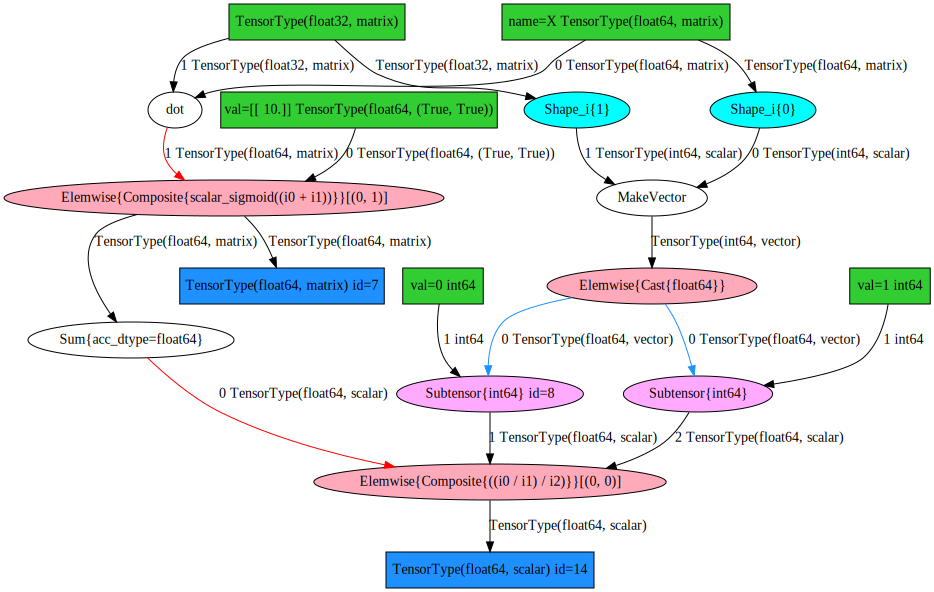

In [24]:
SVG(g.create_svg())

# Profiled graphed 

In [6]:
g = gf.to_pydot(predict_profiled)
d3p.d3print(predict_profiled, 'predict_profiled.html')

OSError: [Errno 2] No such file or directory: ''

[open](./predict_profiled.html) 

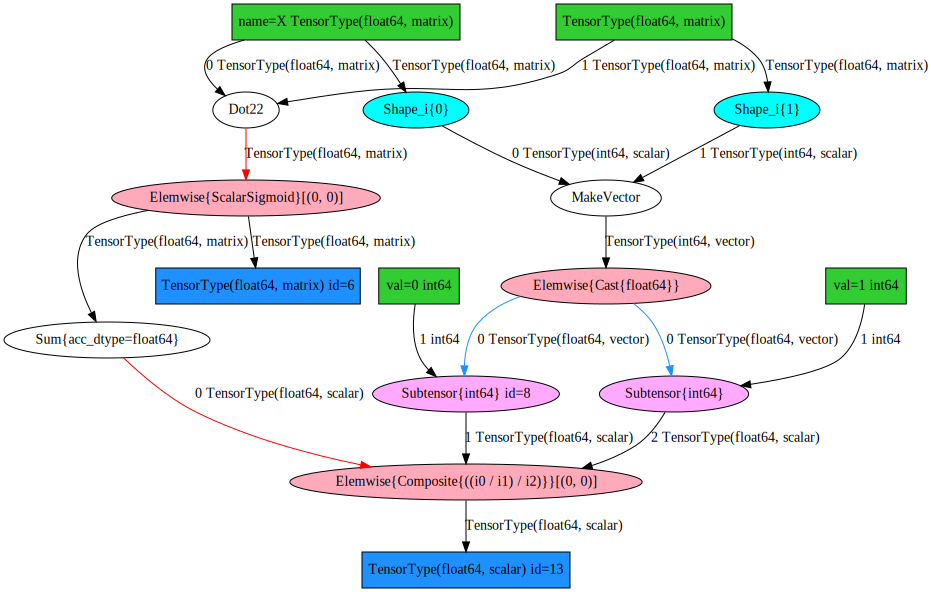

In [6]:
SVG(g.create_svg())

# Unprofiled graph

In [7]:
g = gf.to_pydot(predict_unprofiled)
d3p.d3print(predict_unprofiled, 'predict_unprofiled.html')

The output file is available at predict_unprofiled.html


[open](./predict_unprofiled.html) 

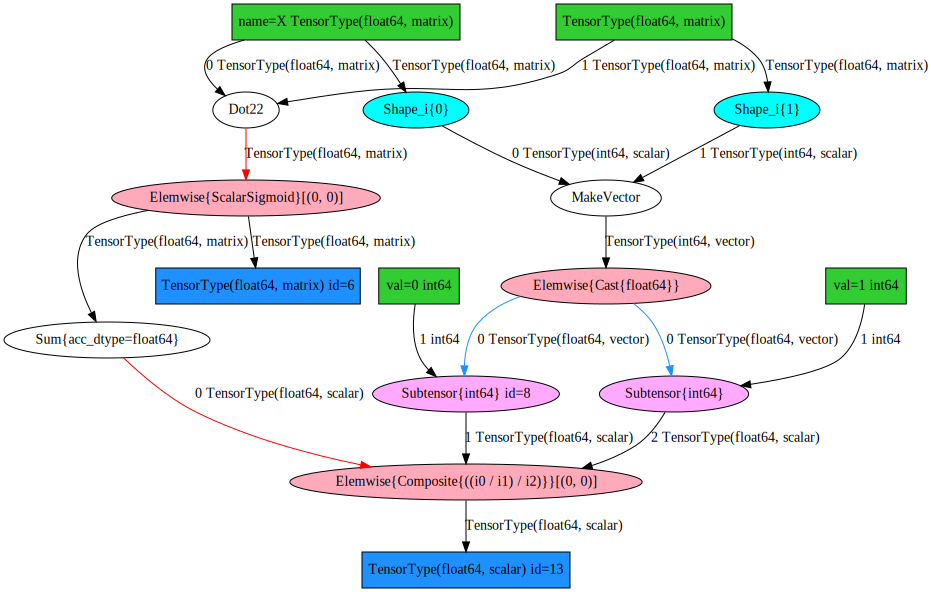

In [8]:
SVG(g.create_svg())